### Bitcoin historic data (extraction)
**Working on it...**

Good [website](http://www.cryptodatadownload.com/) to start with.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Package installation for financial visulizations
#!pip install --upgrade mplfinance
import mplfinance as mpf

plt.style.use('seaborn')
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
btc_path = 'C:/Users/Javi/Desktop/cryptocurrency_predictor/data/crypto/BTCUSDT_1m_data.csv'
columns_to_use = ['timestamp', 'open', 'high', 'low', 'close', 'volume']

btc = pd.read_csv(btc_path, usecols=columns_to_use)

In [3]:
df_btc = btc.copy()
df_btc.info()
df_btc.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87087 entries, 0 to 87086
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  87087 non-null  object 
 1   open       87087 non-null  float64
 2   high       87087 non-null  float64
 3   low        87087 non-null  float64
 4   close      87087 non-null  float64
 5   volume     87087 non-null  float64
dtypes: float64(5), object(1)
memory usage: 4.0+ MB


,timestamp,open,high,low,close,volume
0,2021-01-01 00:00:00,28923.63,28961.66,28913.12,28961.66,27.457032
1,2021-01-01 00:01:00,28961.67,29017.50,28961.01,29009.91,58.477501
2,2021-01-01 00:02:00,29009.54,29016.71,28973.58,28989.30,42.470329
3,2021-01-01 00:03:00,28989.68,28999.85,28972.33,28982.69,30.360677
4,2021-01-01 00:04:00,28982.67,28995.93,28971.80,28975.65,24.124339


In [4]:
# Convert to datetime
df_btc['timestamp'] = pd.to_datetime(df_btc['timestamp'])
# Set date as index
df_btc = df_btc.rename(columns = {'timestamp': 'date'}).set_index('date')

In [5]:
df_btc

,open,high,low,close,volume
date,,,,,
2021-01-01 00:00:00,28923.63,28961.66,28913.12,28961.66,27.457032
2021-01-01 00:01:00,28961.67,29017.50,28961.01,29009.91,58.477501
2021-01-01 00:02:00,29009.54,29016.71,28973.58,28989.30,42.470329
2021-01-01 00:03:00,28989.68,28999.85,28972.33,28982.69,30.360677
2021-01-01 00:04:00,28982.67,28995.93,28971.80,28975.65,24.124339
...,...,...,...,...,...
2021-03-02 12:41:00,48714.47,48734.76,48690.00,48691.71,25.681018
2021-03-02 12:42:00,48691.71,48714.01,48650.00,48701.40,19.348072
2021-03-02 12:43:00,48701.39,48778.17,48701.05,48720.37,20.904706


Now, we have a lot of data here, thank God (which doesn't exist), that it will be helpful in the future. But now we just want to build a preliminary project with toy data, so let's just take a sample to play with filtering by date. **Same dates as twitter extraction sample we got earlier.** <br> Let's do it baby!

In [6]:
df_btc.index.min(), df_btc.index.max()

(Timestamp('2021-01-01 00:00:00'), Timestamp('2021-03-02 12:45:00'))

In [7]:
max_volume = (df_btc['volume'] == df_btc['volume'].max())
# Date with the greatest volume of bitcoins traded
df_btc[max_volume]

,open,high,low,close,volume
date,,,,,
2021-02-22 02:04:00,56705.76,56730.01,55351.15,56354.97,1866.93905


In [8]:
# Preparing the df to plot it 

intraday = df_btc[(df_btc.index > '2021-02-21 15:00:00') & (df_btc.index < '2021-02-22 09:00:00')]
# intraday.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']
# intraday.set_index('Date', inplace=True)
print(intraday.shape)
intraday

(1079, 5)


,open,high,low,close,volume
date,,,,,
2021-02-21 15:01:00,57484.30,57555.00,57484.30,57500.02,50.714899
2021-02-21 15:02:00,57504.83,57524.75,57395.08,57411.54,45.697068
2021-02-21 15:03:00,57411.54,57411.54,57288.00,57320.00,45.517284
2021-02-21 15:04:00,57320.00,57364.78,57296.31,57336.65,29.003769
2021-02-21 15:05:00,57336.65,57361.38,57250.00,57284.22,42.343511
...,...,...,...,...,...
2021-02-22 08:55:00,55650.00,55704.84,55614.98,55626.34,116.704332
2021-02-22 08:56:00,55626.34,55631.46,55498.25,55505.55,129.033953
2021-02-22 08:57:00,55505.60,55599.69,55410.00,55532.56,87.100705


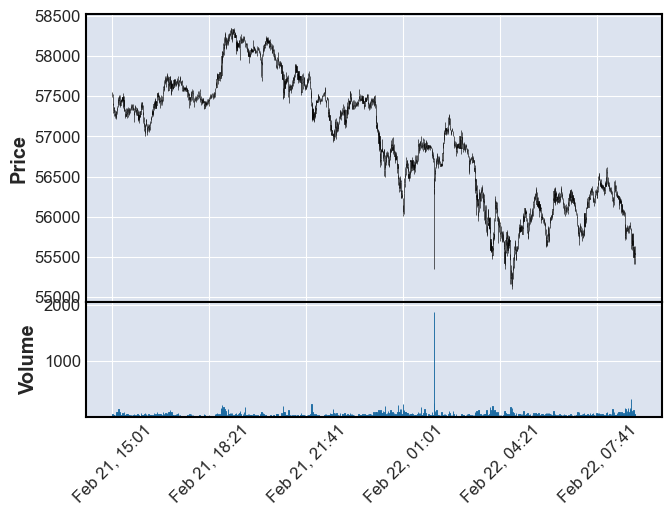

In [9]:
mpf.plot(intraday, type='candle', volume=True)

In [10]:
# # Volume of bitcoins traded in US dollars
# plt.figure(figsize=(10, 6))
# plt.plot(df_btc['date'], df_btc['volume_usd'])

# plt.title('Volume of bitcoins traded in USD')
# plt.xlabel('date (month-day hour)')
# plt.ylabel('million USD')

### Twitter groupbies and sum by time frames

In [11]:
tweets_path = 'C:/Users/Javi/Desktop/cryptocurrency_predictor/data/twitter/scored_tweets.csv'

tweets = pd.read_csv(tweets_path)
df_tweets = tweets.copy()
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584908 entries, 0 to 584907
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   date               584908 non-null  object 
 1   id                 584908 non-null  int64  
 2   text               584908 non-null  object 
 3   followers          584908 non-null  int64  
 4   likes              584908 non-null  int64  
 5   vader_polarity     584908 non-null  float64
 6   textblob_polarity  584908 non-null  float64
 7   emotion            584908 non-null  object 
 8   vader_score        584908 non-null  float64
 9   textblob_score     584908 non-null  float64
dtypes: float64(4), int64(3), object(3)
memory usage: 44.6+ MB


In [12]:
df_tweets = df_tweets[df_tweets['date'] >= '2021-02-21 00:00:00']

In [13]:
df_tweets['date'] = pd.to_datetime(df_tweets['date'])
df_tweets.set_index('date', inplace=True)
print(df_tweets.info())
df_tweets.head(3)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 545014 entries, 2021-02-21 00:00:00 to 2021-03-02 15:26:28
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 545014 non-null  int64  
 1   text               545014 non-null  object 
 2   followers          545014 non-null  int64  
 3   likes              545014 non-null  int64  
 4   vader_polarity     545014 non-null  float64
 5   textblob_polarity  545014 non-null  float64
 6   emotion            545014 non-null  object 
 7   vader_score        545014 non-null  float64
 8   textblob_score     545014 non-null  float64
dtypes: float64(4), int64(3), object(2)
memory usage: 41.6+ MB
None


,id,text,followers,likes,vader_polarity,textblob_polarity,emotion,vader_score,textblob_score
date,,,,,,,,,
2021-02-21,1363277252306358275,RT : Join the Airdrop to get a share of 5 mill...,49,0,0.5267,0.000,Positive,0.263350,0.000
2021-02-21,1363277252557955072,RT : Because not everyone knows: If Bitcoin’s ...,127,0,0.0516,0.250,Positive,0.066048,0.320
2021-02-21,1363277252633354242,RT : In 24 hours I’m going to give one random ...,11,0,0.0000,-0.625,Neutral,0.000000,-0.075


In [14]:
one_min_vader_scores = df_tweets.groupby(pd.Grouper(freq='min'))['vader_polarity', 'vader_score'].sum()

one_min_textblob_scores = df_tweets.groupby(pd.Grouper(freq='min'))['textblob_polarity', 'textblob_score'].sum()

print(one_min_vader_scores.sample(3))
print('*' * 50)
print(one_min_textblob_scores.sample(3))

                     vader_polarity  vader_score
date                                            
2021-02-21 20:54:00         31.3454  1067.736307
2021-03-01 16:34:00          0.0000     0.000000
2021-02-27 21:26:00          0.0000     0.000000
**************************************************
                     textblob_polarity  textblob_score
date                                                  
2021-03-01 02:42:00          24.832465      628.071383
2021-03-01 22:25:00           0.000000        0.000000
2021-03-01 00:00:00           0.000000        0.000000


C:\Users\Javi\Anaconda3\envs\crypto-env\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.
C:\Users\Javi\Anaconda3\envs\crypto-env\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [15]:
# minutely_scores[(minutely_scores.index >= '2021-02-09 01:00:00') & (minutely_scores.index <= '2021-02-09 01:10:00')]

In [19]:
# least_score = df_tweets[(df_tweets.index >= '2021-02-09 01:03:00') & (df_tweets.index <= '2021-02-09 01:05:00')]
# least_score[least_score['score'] == least_score['score'].min()]

### VADER Analysis

Text(0, 0.5, 'Total Score')

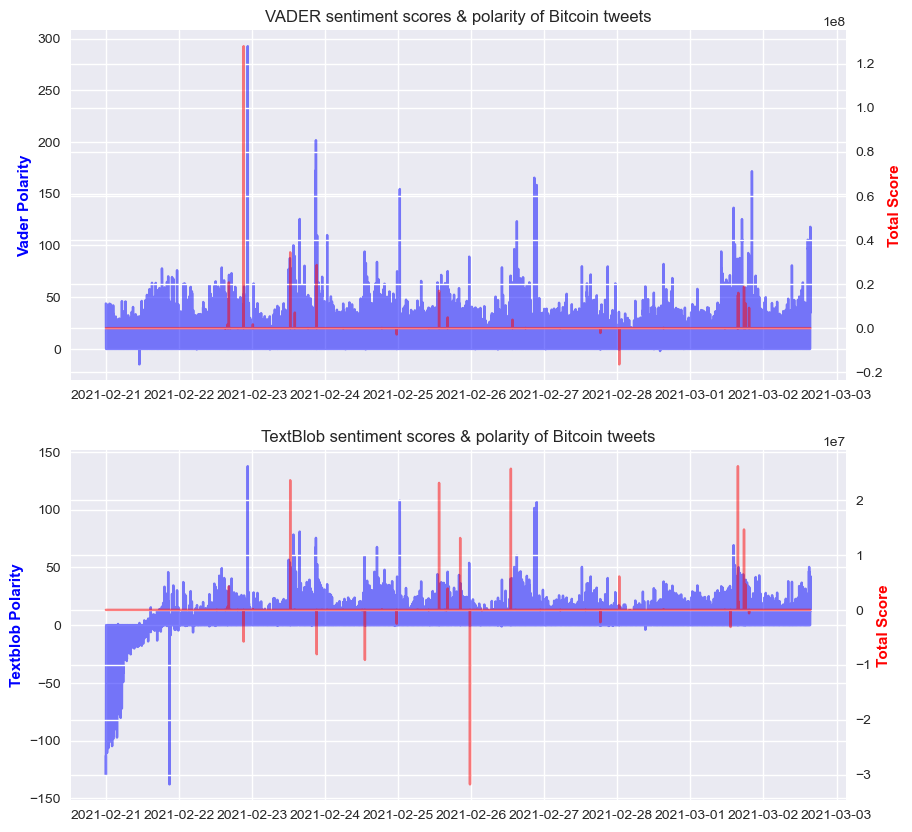

In [15]:
plt.style.use('seaborn')

fig, axes = plt.subplots(2, 1, figsize=(10, 10))
# VADER plot
axes[0].set_title('VADER sentiment scores & polarity of Bitcoin tweets')
ax1 = axes[0].twinx()
axes[0].plot(one_min_vader_scores.index, one_min_vader_scores['vader_polarity'], 'b', alpha=0.5)
ax1.plot(one_min_vader_scores.index, one_min_vader_scores['vader_score'], 'r', alpha=0.5)
axes[0].set_ylabel('Vader Polarity', color='b')
ax1.set_ylabel('Total Score', color='r')

# TextBlob plot
axes[1].set_title('TextBlob sentiment scores & polarity of Bitcoin tweets')
ax2 = axes[1].twinx()
axes[1].plot(one_min_vader_scores.index, one_min_textblob_scores['textblob_polarity'], 'b', alpha=0.5)
ax2.plot(one_min_vader_scores.index, one_min_textblob_scores['textblob_score'], 'r', alpha=0.5)
axes[1].set_ylabel('Textblob Polarity', color='b')
ax2.set_ylabel('Total Score', color='r')


In [17]:
# Reduce bitcoin df length to match 
df_btc = df_btc[(df_btc.index >= df_tweets.index.min()) & (df_btc.index <= df_tweets.index.max())]
df_btc.head()

,open,high,low,close,volume
date,,,,,
2021-02-21 00:00:00,55841.19,55987.97,55822.33,55885.13,134.205366
2021-02-21 00:01:00,55882.34,55899.83,55622.30,55748.36,117.877839
2021-02-21 00:02:00,55754.73,55850.00,55731.33,55745.63,87.712717
2021-02-21 00:03:00,55745.62,55826.06,55677.00,55826.06,59.355978
2021-02-21 00:04:00,55826.05,55837.90,55653.28,55700.00,63.994262


In [18]:
data = pd.merge(df_btc, one_min_vader_scores, right_index=True, left_index=True)
data

,open,high,low,close,volume,vader_polarity,vader_score
date,,,,,,,
2021-02-21 00:00:00,55841.19,55987.97,55822.33,55885.13,134.205366,43.8765,5394.273032
2021-02-21 00:01:00,55882.34,55899.83,55622.30,55748.36,117.877839,27.2732,-415.461037
2021-02-21 00:02:00,55754.73,55850.00,55731.33,55745.63,87.712717,43.4384,148.487997
2021-02-21 00:03:00,55745.62,55826.06,55677.00,55826.06,59.355978,5.3143,432.821440
2021-02-21 00:04:00,55826.05,55837.90,55653.28,55700.00,63.994262,0.0000,0.000000
...,...,...,...,...,...,...,...
2021-03-02 12:41:00,48714.47,48734.76,48690.00,48691.71,25.681018,0.0000,0.000000
2021-03-02 12:42:00,48691.71,48714.01,48650.00,48701.40,19.348072,0.0000,0.000000
2021-03-02 12:43:00,48701.39,48778.17,48701.05,48720.37,20.904706,0.0000,0.000000


In [20]:
data['vader_score'].min(), data['vader_score'].max()

(-16424406.881052002, 127923011.941395)

Text(0, 0.5, 'VADER Sentiment Score')

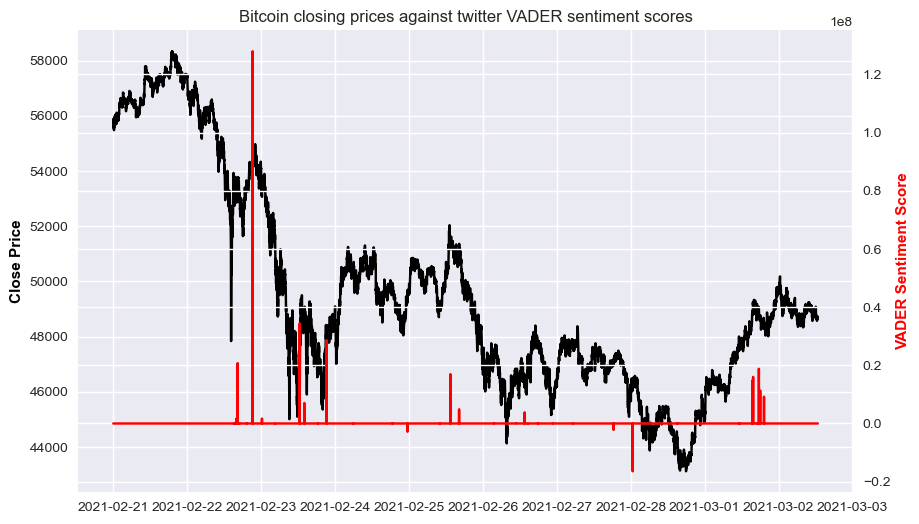

In [21]:
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.set_title('Bitcoin closing prices against twitter VADER sentiment scores')
ax2 = ax1.twinx()

ax1.plot(data.index, data['close'], 'k')
ax2.plot(data.index, data['vader_score'], 'r')

ax1.set_ylabel('Close Price', color='k')
ax2.set_ylabel('VADER Sentiment Score', color='r')

**TextBlob Scores**

Text(0, 0.5, 'TextBlob Sentiment score')

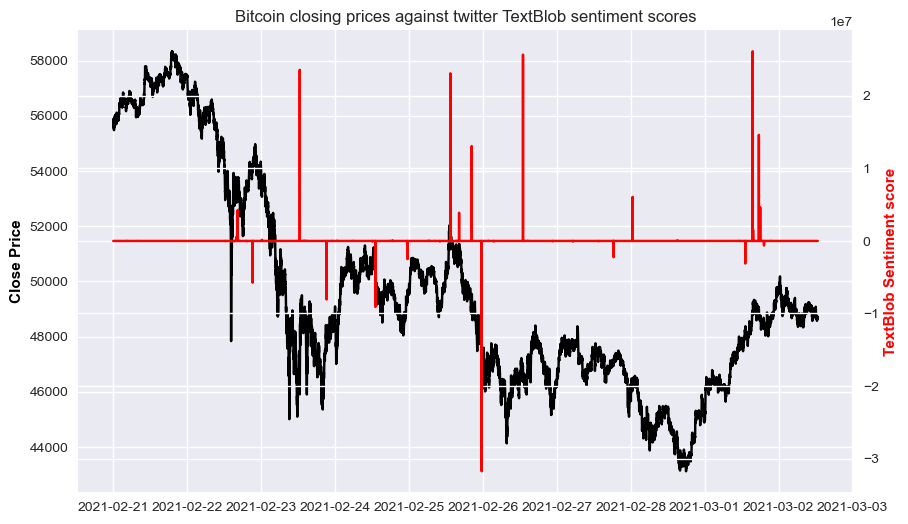

In [23]:
# Creating a df for textblob
data_tb = pd.merge(df_btc, one_min_textblob_scores, right_index=True, left_index=True)
# Plot
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.set_title('Bitcoin closing prices against twitter TextBlob sentiment scores')
ax2 = ax1.twinx()

ax1.plot(data.index, data['close'], 'k')
ax2.plot(data.index, data_tb['textblob_score'], 'r')

ax1.set_ylabel('Close Price', color='k')
ax2.set_ylabel('TextBlob Sentiment score', color='r')

VADER sentiment scores seem to be more correlated to Bitcoin prices than TextBlob scores, as we thought even before plotting.